# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_longs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 554


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
q_url = f"{base_url}&appid={weather_api_key}&units={units}&q="


In [4]:
# Test with one city

test_city = cities[0]
test_url = q_url + test_city
response = requests.get(test_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -53.15, 'lon': -70.9167},
 'dt': 1718037955,
 'id': 3874787,
 'main': {'feels_like': 35.42,
          'humidity': 93,
          'pressure': 1012,
          'temp': 35.42,
          'temp_max': 35.71,
          'temp_min': 35.11},
 'name': 'Punta Arenas',
 'sys': {'country': 'CL',
         'id': 8487,
         'sunrise': 1718024072,
         'sunset': 1718051527,
         'type': 1},
 'timezone': -10800,
 'visibility': 8000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 330, 'speed': 1.14}}


In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = q_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        status_code = response.status_code
        
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}         

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_long = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt", {})

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Long": city_long, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
       print("City {e} not found. Skipping...")
       pass

    time.sleep(0.5)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | menongue
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | tanrake village
Processing Record 8 of Set 1 | korwai
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | maddagiri
Processing Record 13 of Set 1 | abalak
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | taiohae
Processing Record 16 of Set 1 | daru
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | kyzylorda
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 of Set 1 | lebu
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           526
Long          526
Max Temp      526
Humidity      526
Cloudiness    526
Wind Speed    526
Country       526
Date          554
dtype: int64

In [7]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        554 non-null    object 
 1   Lat         526 non-null    float64
 2   Long        526 non-null    float64
 3   Max Temp    526 non-null    float64
 4   Humidity    526 non-null    float64
 5   Cloudiness  526 non-null    float64
 6   Wind Speed  526 non-null    float64
 7   Country     526 non-null    object 
 8   Date        554 non-null    object 
dtypes: float64(6), object(3)
memory usage: 39.1+ KB


In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,35.71,93.0,75.0,1.14,CL,1718037955
1,wailua homesteads,22.0669,-159.3780,74.19,81.0,20.0,17.27,US,1718037970
2,tiksi,71.6872,128.8694,33.35,90.0,19.0,7.14,RU,1718037970
3,menongue,-14.6585,17.6910,66.04,34.0,7.0,5.84,AO,1718037971
4,hawaiian paradise park,19.5933,-154.9731,71.11,97.0,100.0,6.91,US,1718037972


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,35.71,93.0,75.0,1.14,CL,1718037955
1,wailua homesteads,22.0669,-159.3780,74.19,81.0,20.0,17.27,US,1718037970
2,tiksi,71.6872,128.8694,33.35,90.0,19.0,7.14,RU,1718037970
3,menongue,-14.6585,17.6910,66.04,34.0,7.0,5.84,AO,1718037971
4,hawaiian paradise park,19.5933,-154.9731,71.11,97.0,100.0,6.91,US,1718037972


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

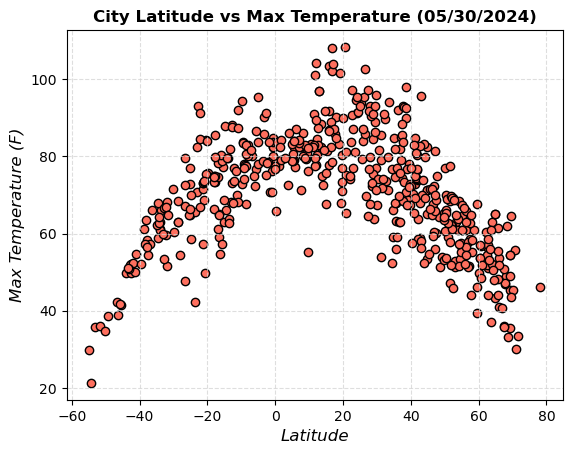

In [11]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x, y, marker='o', facecolor='#FE6F5E', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature (05/30/2024)', fontweight="bold", fontsize=12)
plt.xlabel('Latitude', fontsize=12, fontstyle="italic")
plt.ylabel('Max Temperature (F)',fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

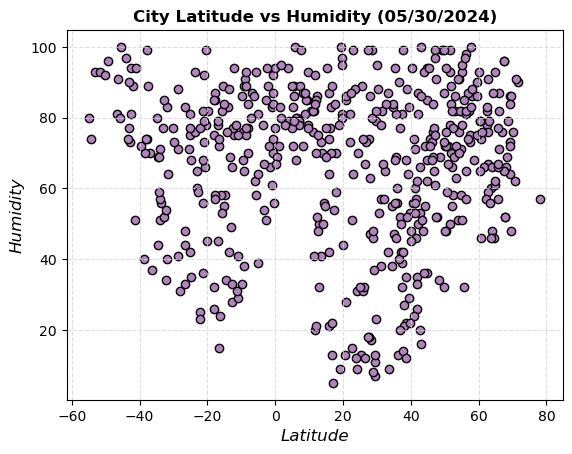

In [12]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(x, y, marker='o', facecolor='#B284BE', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (05/30/2024)', fontweight="bold", fontsize=12)
plt.xlabel('Latitude', fontsize=12, fontstyle="italic")
plt.ylabel('Humidity',fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

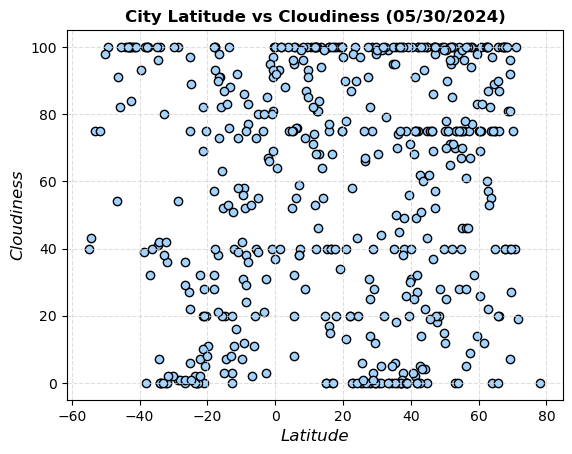

In [45]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(x, y, marker='o', edgecolor='black', facecolor='#A2D2FF')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (05/30/2024)', fontweight="bold", fontsize=12)
plt.xlabel('Latitude', fontsize=12, fontstyle="italic")
plt.ylabel('Cloudiness',fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

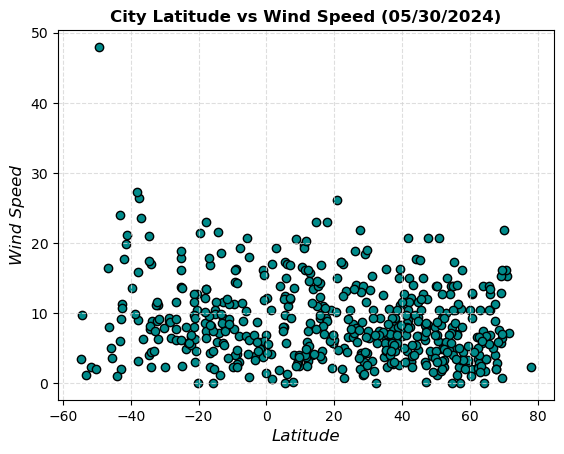

In [14]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(x, y, marker='o', facecolor='#008B8B', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (05/30/2024)', fontweight="bold", fontsize=12)
plt.xlabel('Latitude', fontsize=12, fontstyle="italic")
plt.ylabel('Wind Speed',fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, y_label, eq_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = slope * x_values + intercept
    line_eq = "Y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, edgecolor='#696969', facecolor=facecolor)
    plt.plot(x_values, regression_values, "#03045E")
    plt.annotate(line_eq, eq_coord, color="#03045E")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)

    print(f"R-value: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,74.19,81.0,20.0,17.27,US,1718037970
2,tiksi,71.6872,128.8694,33.35,90.0,19.0,7.14,RU,1718037970
4,hawaiian paradise park,19.5933,-154.9731,71.11,97.0,100.0,6.91,US,1718037972
7,korwai,24.1167,78.0419,91.35,31.0,43.0,6.58,IN,1718037974
9,olonkinbyen,70.9221,-8.7187,30.13,91.0,100.0,15.32,SJ,1718037975


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,35.71,93.0,75.0,1.14,CL,1718037955
3,menongue,-14.6585,17.6910,66.04,34.0,7.0,5.84,AO,1718037971
5,adamstown,-25.0660,-130.1015,72.79,81.0,97.0,17.83,PN,1718037972
8,ushuaia,-54.8000,-68.3000,29.86,80.0,40.0,3.44,AR,1718037974
13,grytviken,-54.2811,-36.5092,21.31,74.0,43.0,9.75,GS,1718037978


###  Temperature vs. Latitude Linear Regression Plot

R-value: 0.5633737127944489


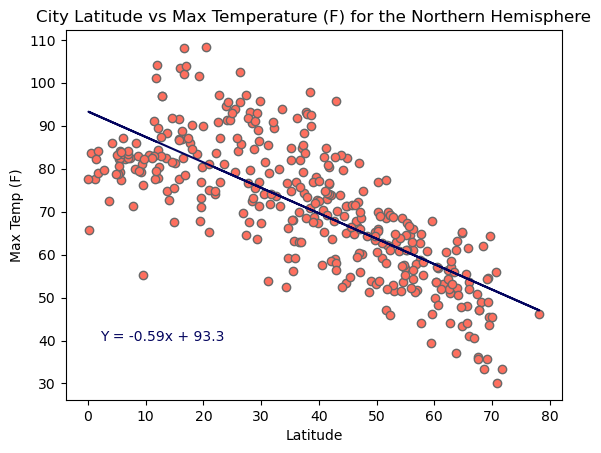

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
facecolor = '#FE6F5E'
title = "City Latitude vs Max Temperature (F) for the Northern Hemisphere"
eq_coord = (2, 40)

linear_regression(x_values, y_values, title, "Max Temp (F)", eq_coord)

R-value: 0.6477081762163048


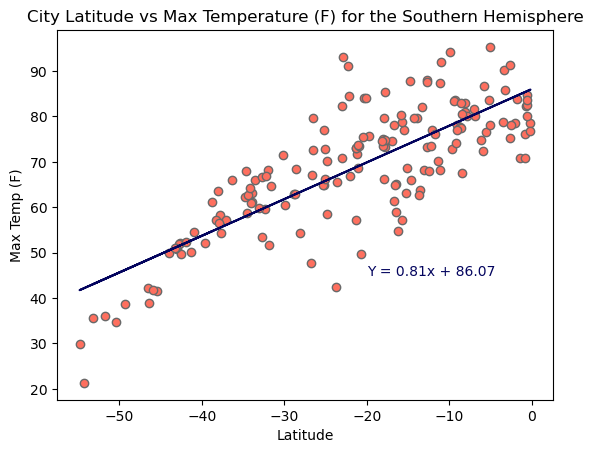

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
facecolor = '#FE6F5E'
title = "City Latitude vs Max Temperature (F) for the Southern Hemisphere"
eq_coord = (-20, 45)

linear_regression(x_values, y_values, title, "Max Temp (F)", eq_coord)

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and temperature, indicating that temperatures decrease more the farther the city is from the equator. R values above 0.5 describe the dependency of these two variables to each other as fairly strong.

### Humidity vs. Latitude Linear Regression Plot

R-value: 0.004950632330507599


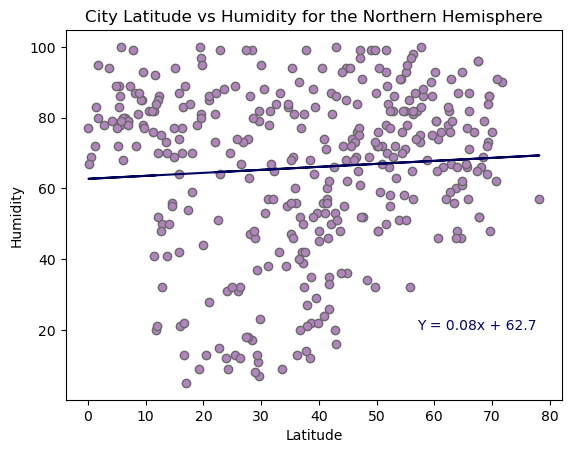

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
facecolor='#B284BE'
title = "City Latitude vs Humidity for the Northern Hemisphere"
eq_coord = (57, 20)

linear_regression(x_values, y_values, title, "Humidity", eq_coord)

R-value: 0.009477980383557875


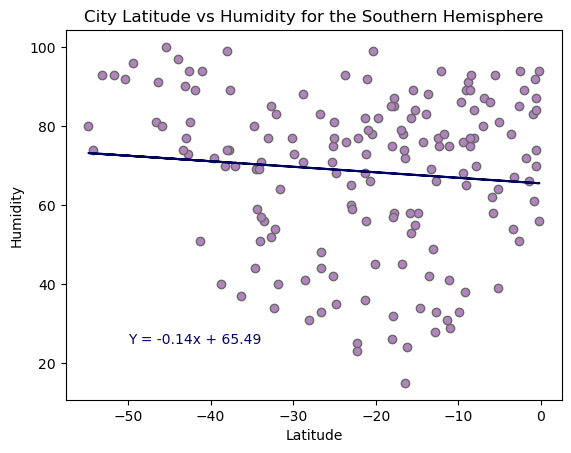

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
facecolor='#B284BE'
title = "City Latitude vs Humidity for the Southern Hemisphere"
eq_coord = (-50, 25)

linear_regression(x_values, y_values, title, "Humidity", eq_coord)

**Discussion about the linear relationship:** There appears to be no solid correlation between latitude and humidity. The r-values being very close to zero supports this lack of dependency between those two variables.

### Cloudiness vs. Latitude Linear Regression Plot

R-value: 9.04388026557171e-05


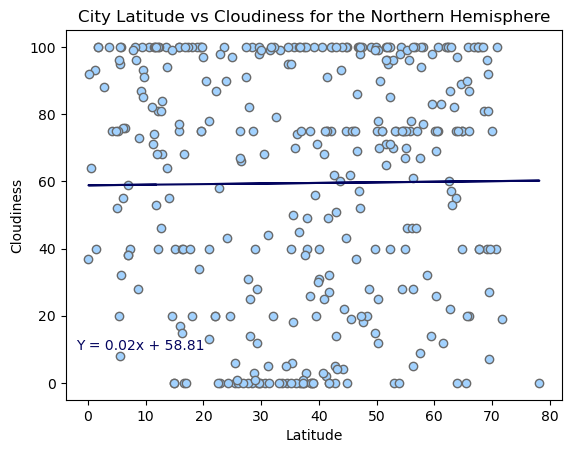

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
facecolor='#A2D2FF'
title = "City Latitude vs Cloudiness for the Northern Hemisphere"
eq_coord = (-2, 10)

linear_regression(x_values, y_values, title, "Cloudiness", eq_coord)

R-value: 0.011220376570532346


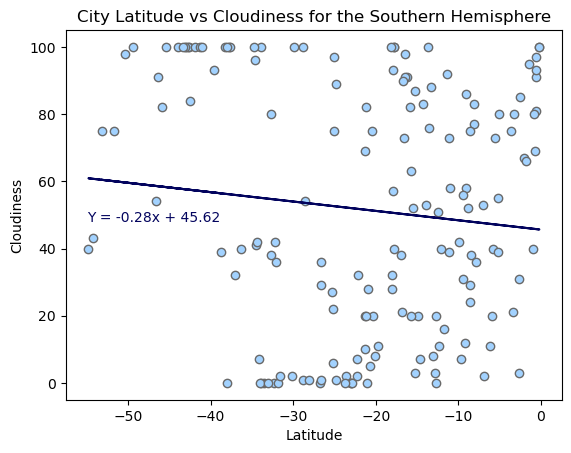

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
facecolor='#A2D2FF'
title = "City Latitude vs Cloudiness for the Southern Hemisphere"
eq_coord = (-55, 48)

linear_regression(x_values, y_values, title, "Cloudiness", eq_coord)

**Discussion about the linear relationship:** Based on the line of best fit, cloudiness appears to decrease very slightly the closer the city is to the equator, but there are lots of data points that don't follow this trend so the correlation is weak. R-values near zero support this lack of dependency.

### Wind Speed vs. Latitude Linear Regression Plot

R-value: 0.027849722801516336


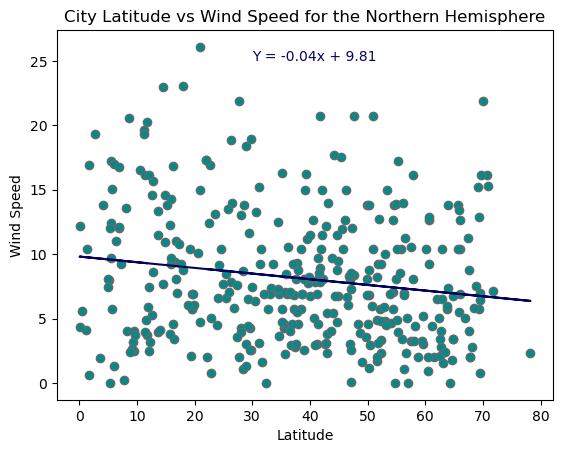

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
facecolor='#008B8B'
title = "City Latitude vs Wind Speed for the Northern Hemisphere"
eq_coord = (30, 25)

linear_regression(x_values, y_values, title, "Wind Speed", eq_coord)

R-value: 0.03112424127410564


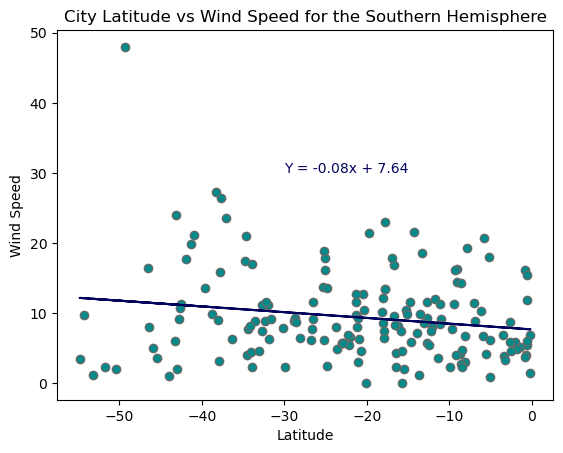

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
facecolor='#008B8B'
title = "City Latitude vs Wind Speed for the Southern Hemisphere"
eq_coord = (-30, 30)

linear_regression(x_values, y_values, title, "Wind Speed", eq_coord)

**Discussion about the linear relationship:** There appears to be no correlation with latitude and wind speed, as wind speed decreases in the northern hemisphere farther from the equator but it increases in the southern hemisphere farther from the equator. R-values near zero again support the lack of dependency between these two variables.